# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [11]:
# Import your libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [7]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

0    (0.18046696123222097, 0.9137178249637258)
1    (0.18542922873906936, 0.9114535789372868)
2     (1.0061806662609438, 0.6046591711712155)
3     (2.158665278484869, 0.33982223401191897)
4     (1.0789656999148183, 0.5830496985972697)
dtype: object

#### Interpret the normaltest results and make your observations.

When the statistic is closer to 0, the distribution is then closer to normal and the p value higher as the hypothesis is not rejected with more strength (more evidence that it is a normal). There is no relationship between the sample size and the results in this example.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

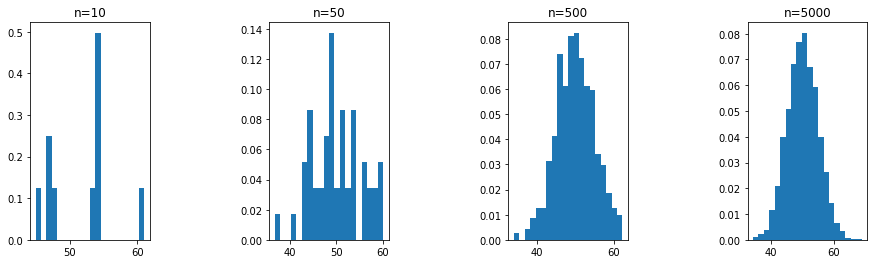

In [12]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

We can see that the bigger the sample, the more similar the plots become and closer they get to a normal distribution. This follows the Central limit theorem which states that the sampling distribution of the mean approaches a normal distribution as the sample gets larger


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

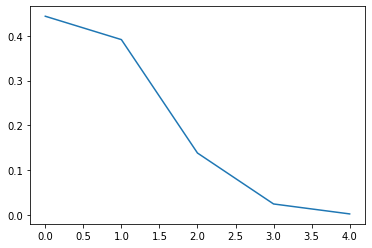

In [13]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

The larger the sample, the lower the probability of everyone cliking on the ad. 

#### Now plot PMP with 50, 500, and 5000 visitors.

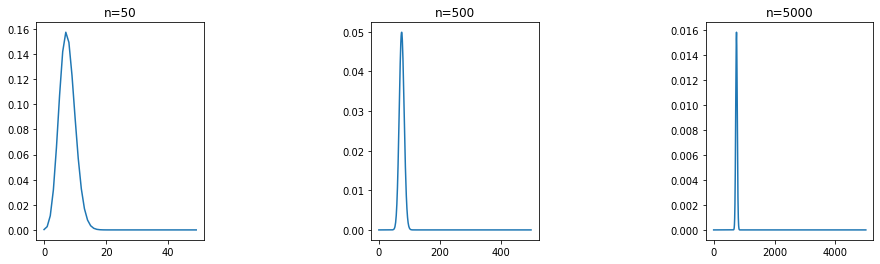

In [25]:
# Your code here
f, ax = plt.subplots(1, 3)
f.set_figwidth(15)
f.subplots_adjust(wspace=1)
sample_size = [50, 500, 5000]
p = 0.15


for i in range(0, 3):
    n=sample_size[i]
    x = range(n)
    ax[i].set_title('n=%s' % (n))
    dist = binom(n, p)
    ax[i].plot(x, dist.pmf(x))


#### What did you notice from the distribution plots? Comment your findings.


The higher the sample size, the lower the probability of the mean, given that overall the people clicking must always equal to 0.15 x n, the values close to the mean also have a high probability which must be shared along the entire space to be equal to 1 (given it is a PMF).

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

The Poisson distribution gives the probability of a number of independent events occurring in a fixed time interval. In this distribution, the probability of a certain event is constant in the time interval and the poisson parameter is proportional to the length of the interval. For instance, is between 8am and 8:15am 30 people go into the office and this follows a poisson distribution, then we would be able to conclude that betweeen 8:15 and 8:45 almost 60 people will enter etc.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [50]:
# Your code here
from scipy.stats import poisson
%matplotlib inline
scipy.stats.poisson.pmf(320,300)


0.011612348610402475

#### What is the probability of getting 60 visits?

In [51]:
# Your code here
scipy.stats.poisson.pmf(60,300)


2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

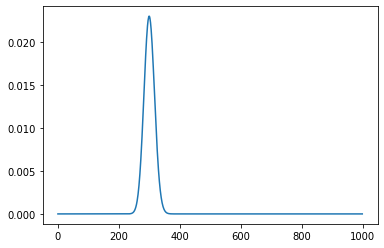

In [52]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)